## Phase 1 Project Submission

Please fill out:
* Student name: Leon Maina
* Scheduled project review date/time: 
* Instructor name: William Okomba/ Noah Kandie/ Samuel Mwangi
  

## Introduction

Major firms are producing a growing amount of original content for the entertainment industry, especially in the movie business. Seeing this trend, Microsoft has made the decision to open a new film studio and enter the film industry. But because Microsoft lacks experience in the film business, it needs to know what kinds of movies are currently doing well on the box office. With the purpose of assisting Microsoft in making profitable content decisions, this project aims to investigate and evaluate the landscape of popular movies.


## Stakeholders

The following people are the project's main stakeholders:

1. **Director of Microsoft's New Film Production Studio:** - One important stakeholder is the head of Microsoft's new film studio. They want practical knowledge about the kinds ofiesvare currently doing well at the box office. These observations can help inform choices about the genres, production costs, and other important movie-related factors that Microsoft should make.


## Project Value

This project aims to provide valuable insights to Microsoft's new movie studio by:

- Identifying the most successful genres in terms of box office performance.
- Analyzing the correlation between production budget and box office success.
- Offering recommendations on the types of films that are likely to perform well, guiding strategic decisions for Microsoft's entry into the movie industry.


## Data Sources

The dataset used in this analysis was obtaedin by combining multiple datasets from popular movie review websites like www.themoviedb.org and www.the-numbers.com k]. It contains information on various movies, including their genres, popularity, vote averages, production budgets, and box office performance. The data source provides a comprehensive view of the movie landscape, making it suitable for our analysis.


## Data Properties

The dataset comprises key features like [genre, popularity, production budgets and movie sales] that are crucial for understanding the factors influencing a movie's success. These properties align with our real-world problem as we seek to identify patterns in successful films and guide Microsoft's decision-making in the movie industry.


In [1]:
# Your code here - 
import pandas as pd
import numpy as np
# Load datasets
movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
basics = pd.read_csv('imdb.title.basics.csv.gz')
ratings = pd.read_csv('imdb.title.ratings.csv.gz')
movie_budget = pd.read_csv('tn.movie_budgets.csv.gz')
tmdb_movie = pd.read_csv('tmdb.movies.csv.gz')
movie_info = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')
rt_movie_review = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='latin1')

### DATASETS TO USE: basics, ratings, movie_budget and tmdb_movie

In [2]:
basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
rt_movie_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


### DATA CLEANING
* MISSING VALUES

In [7]:
# Missing values
def get_null(data):
    null_count = []
    for column in data.columns:
        null_count.append((column, data[column].isna().value_counts()))
    return null_count 
get_null(basics) 
# primary_title = 1, original_title = 1, runtime_minutes = 31,739, genres = 5408 missing values

[('tconst',
  tconst
  False    146144
  Name: count, dtype: int64),
 ('primary_title',
  primary_title
  False    146143
  True          1
  Name: count, dtype: int64),
 ('original_title',
  original_title
  False    146122
  True         22
  Name: count, dtype: int64),
 ('start_year',
  start_year
  False    146144
  Name: count, dtype: int64),
 ('runtime_minutes',
  runtime_minutes
  False    114405
  True      31739
  Name: count, dtype: int64),
 ('genres',
  genres
  False    140736
  True       5408
  Name: count, dtype: int64)]

In [8]:
# Missing values
get_null(ratings)
# No missing values

[('tconst',
  tconst
  False    73856
  Name: count, dtype: int64),
 ('averagerating',
  averagerating
  False    73856
  Name: count, dtype: int64),
 ('numvotes',
  numvotes
  False    73856
  Name: count, dtype: int64)]

In [9]:
# Missing values
get_null(movie_budget)
# No missing values

[('id',
  id
  False    5782
  Name: count, dtype: int64),
 ('release_date',
  release_date
  False    5782
  Name: count, dtype: int64),
 ('movie',
  movie
  False    5782
  Name: count, dtype: int64),
 ('production_budget',
  production_budget
  False    5782
  Name: count, dtype: int64),
 ('domestic_gross',
  domestic_gross
  False    5782
  Name: count, dtype: int64),
 ('worldwide_gross',
  worldwide_gross
  False    5782
  Name: count, dtype: int64)]

In [10]:
# Missing Values
get_null(tmdb_movie)
# No null values

[('Unnamed: 0',
  Unnamed: 0
  False    26517
  Name: count, dtype: int64),
 ('genre_ids',
  genre_ids
  False    26517
  Name: count, dtype: int64),
 ('id',
  id
  False    26517
  Name: count, dtype: int64),
 ('original_language',
  original_language
  False    26517
  Name: count, dtype: int64),
 ('original_title',
  original_title
  False    26517
  Name: count, dtype: int64),
 ('popularity',
  popularity
  False    26517
  Name: count, dtype: int64),
 ('release_date',
  release_date
  False    26517
  Name: count, dtype: int64),
 ('title',
  title
  False    26517
  Name: count, dtype: int64),
 ('vote_average',
  vote_average
  False    26517
  Name: count, dtype: int64),
 ('vote_count',
  vote_count
  False    26517
  Name: count, dtype: int64)]

* HANDLING MISSING VALUES

In [11]:
# Basics
# Drop empty row of primary_title can't be imputed as original_title is also empty and can't be inferenced.
basics.dropna(subset=['primary_title'], inplace = True)
# Impute empty original_title values with corresponding primary_title value.
basics['original_title'].fillna(basics['primary_title'], inplace = True)
# Drop empty genre rows
[basics[basics['genres'].isnull() & basics['runtime_minutes'].isnull()]]
basics.dropna(subset = ['genres'], inplace = True)

# ratings and movie_budgets have no NaN values

* HANDLING DUPLICATES

In [12]:
# Basics
basics.duplicated().value_counts()
# Ratings
ratings.duplicated().value_counts()
# Movie Budgets
movie_budget.duplicated().value_counts()
# TMDB
tmdb_movie.duplicated().value_counts()


# No duplicates on rows, although movie title columns have duplicates as some movies have the same name.

False    26517
Name: count, dtype: int64

* MERGING DATASETS

** 'basics', 'ratings', 'movie_budgets'

In [13]:
# Defining functions
def get_null(dataset):
    return dataset.isnull().sum()
def get_dup(dataset):
    return dataset.apply(lambda x: x.duplicated().sum())




In [14]:
# Convert release_date to datetime
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'])

# Extract the year
movie_budget['release_year'] = movie_budget['release_date'].dt.year

In [15]:
# Merge datasets on primary key columns
basic_rating = pd.merge(basics, ratings, on='tconst', how='inner')
basic_rating.drop('runtime_minutes', axis=1, inplace=True)
basic_rating

# Merge datasets based on 'primary_title', 'movie', and 'release_year'
movie_rating = pd.merge(basic_rating, movie_budget, how='inner', left_on=['primary_title', 'start_year'], right_on=['movie', 'release_year'])

In [16]:
# Changing and replacing values
movie_rating['domestic_gross'] = movie_rating['domestic_gross'].replace('$0', np.nan)
movie_rating['worldwide_gross'] = movie_rating['worldwide_gross'].replace('$0', np.nan)
movie_rating[movie_rating['domestic_gross'].isnull()]
movie_rating.dropna(subset=['domestic_gross', 'worldwide_gross'], inplace=True)

# Converting column types
columns_to_convert = ['domestic_gross', 'worldwide_gross', 'production_budget']
movie_rating[columns_to_convert] = movie_rating[columns_to_convert].replace('[\$,]', '', regex=True).astype(float)


In [17]:
#Dropping additional columns
movie_rating = movie_rating.drop(columns=['id', 'original_title', 'primary_title', 'start_year'])

# Ordering 
new_order = ['tconst', 'movie', 'genres', 'averagerating', 'numvotes',
             'production_budget', 'domestic_gross', 'worldwide_gross',
             'release_year', 'release_date']
movie_rating = movie_rating[new_order]



# Checking for duplicates
get_dup(movie_rating)
    
movie_rating.drop_duplicates(subset=['movie'], inplace=True)

movie_rating

,tconst,movie,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,release_year,release_date
1,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,91000000.0,58236838.0,1.878612e+08,2013,2013-12-25
2,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,28000000.0,26017685.0,6.210859e+07,2014,2014-09-19
3,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,215000000.0,652270625.0,1.648855e+09,2015,2015-06-12
4,tt0376136,The Rum Diary,"Comedy,Drama",6.2,94787,45000000.0,13109815.0,2.154473e+07,2011,2011-10-28
5,tt0383010,The Three Stooges,"Comedy,Family",5.1,28570,30000000.0,44338224.0,5.405225e+07,2012,2012-04-13
...,...,...,...,...,...,...,...,...,...,...
1489,tt7784604,Hereditary,"Drama,Horror,Mystery",7.3,151571,10000000.0,44069456.0,7.013390e+07,2018,2018-06-08
1490,tt7959026,The Mule,"Crime,Drama,Thriller",7.1,58955,50000000.0,103804407.0,1.708577e+08,2018,2018-12-14
1492,tt8155288,Happy Death Day 2U,"Drama,Horror,Mystery",6.3,27462,9000000.0,28051045.0,6.417950e+07,2019,2019-02-13
1494,tt8632862,Fahrenheit 11/9,Documentary,6.7,11628,5000000.0,6352306.0,6.653715e+06,2018,2018-09-21


** 'movie_budget'and 'tmdb_movie'

In [18]:
# Convert release_date to datetime
tmdb_movie['release_date'] = pd.to_datetime(tmdb_movie['release_date'])
tmdb_movie['start_year'] = tmdb_movie['release_date'].dt.year

# Merge datasets
tmdb_budget = pd.merge(tmdb_movie, movie_budget, how='inner', left_on=['title', 'start_year'], right_on=['movie', 'release_year'])

# Drop columns
tmdb_budget = tmdb_budget.drop(columns=['start_year', 'release_date_x', 'id_y', 'original_title', 'title', 'Unnamed: 0', 'original_language'])



In [19]:
# Changing Column Names
new_column_names = {'id_x':'id', 'release_date_y':'release_date' }
tmdb_budget.rename(columns= new_column_names, inplace=True)

# Changing & Replacing Values
tmdb_budget['domestic_gross'] = tmdb_budget['domestic_gross'].replace('$0', np.nan)
tmdb_budget['worldwide_gross'] = tmdb_budget['worldwide_gross'].replace('$0', np.nan)
tmdb_budget.dropna(subset=['domestic_gross', 'worldwide_gross'], inplace=True)
tmdb_budget[tmdb_budget['domestic_gross'].isnull()] 

tmdb_budget.shape
     
# Remove commas and dollar signs and convert to float
columns_to_convert = ['domestic_gross', 'worldwide_gross', 'production_budget']
tmdb_budget[columns_to_convert] = tmdb_budget[columns_to_convert].replace('[\$,]', '', regex=True).astype(float)

In [20]:
# From TMDB website
genre_dict= {'Action':28, 'Adventure':12, 'Animation':16, 'Comedy':35, 'Crime':80,
             'Documentary':99, 'Drama':18, 'Family':10751, 'Fantasy':14, 'History':36,
             'Horror':27, 'Music':10402, 'Mystery':9648, 'Romance':10749, 'Science Fiction':878,
             'TV Movie':10770, 'Thriller':53, 'War':10752, 'Western':37}

# Create a new 'genre' column by mapping genre_ids to names
tmdb_budget['genre'] = tmdb_budget['genre_ids'].apply(lambda ids: [key for key, value in genre_dict.items() if value in eval(ids)])
tmdb_budget['genre'] = tmdb_budget['genre'].apply(lambda genres: ', '.join(genres))

#Ordering
new_order = ['id', 'movie', 'genre', 'popularity', 'vote_average',
             'vote_count','production_budget', 'domestic_gross', 'worldwide_gross',
             'release_year', 'release_date', 'genre_ids']
tmdb_budget = tmdb_budget[new_order]
tmdb_budget.shape

(1613, 12)

In [21]:
# Checking for duplicates
get_dup(tmdb_budget)

# Drop duplicates
tmdb_budget.drop_duplicates(subset=['movie'], inplace=True)

In [22]:
tmdb_budget

,id,movie,genre,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,release_year,release_date,genre_ids
0,10191,How to Train Your Dragon,"Adventure, Animation, Family, Fantasy",28.734,7.7,7610,165000000.0,217581232.0,494870992.0,2010,2010-03-26,"[14, 12, 16, 10751]"
1,10138,Iron Man 2,"Action, Adventure, Science Fiction",28.515,6.8,12368,170000000.0,312433331.0,621156389.0,2010,2010-05-07,"[12, 28, 878]"
2,862,Toy Story,"Animation, Comedy, Family",28.005,7.9,10174,30000000.0,191796233.0,364545516.0,1995,1995-11-22,"[16, 35, 10751]"
4,27205,Inception,"Action, Adventure, Science Fiction",27.920,8.3,22186,160000000.0,292576195.0,835524642.0,2010,2010-07-16,"[28, 878, 12]"
5,32657,Percy Jackson & the Olympians: The Lightning T...,"Adventure, Family, Fantasy",26.691,6.1,4229,95000000.0,88768303.0,223050874.0,2010,2010-02-12,"[12, 14, 10751]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1751,503314,Dragon Ball Super: Broly,"Action, Adventure, Animation, Comedy, Fantasy,...",6.868,7.4,721,8500000.0,30376755.0,122747755.0,2019,2019-01-16,"[28, 16, 14, 12, 35, 878]"
1752,433694,Sgt. Stubby: An American Hero,"Adventure, Animation, Family, History, War",6.107,6.4,9,25000000.0,3054285.0,3645957.0,2018,2018-04-13,"[16, 12, 10751, 36, 10752]"
1754,514407,Indivisible,"Drama, War",5.599,5.4,13,2700000.0,3511417.0,3588305.0,2018,2018-10-26,"[18, 10752]"
1755,547590,El Chicano,"Action, Crime, Drama",5.274,9.0,1,8000000.0,700261.0,700261.0,2019,2019-05-03,"[18, 28, 80]"


In [23]:
movie_rating

,tconst,movie,genres,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross,release_year,release_date
1,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,91000000.0,58236838.0,1.878612e+08,2013,2013-12-25
2,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,28000000.0,26017685.0,6.210859e+07,2014,2014-09-19
3,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,215000000.0,652270625.0,1.648855e+09,2015,2015-06-12
4,tt0376136,The Rum Diary,"Comedy,Drama",6.2,94787,45000000.0,13109815.0,2.154473e+07,2011,2011-10-28
5,tt0383010,The Three Stooges,"Comedy,Family",5.1,28570,30000000.0,44338224.0,5.405225e+07,2012,2012-04-13
...,...,...,...,...,...,...,...,...,...,...
1489,tt7784604,Hereditary,"Drama,Horror,Mystery",7.3,151571,10000000.0,44069456.0,7.013390e+07,2018,2018-06-08
1490,tt7959026,The Mule,"Crime,Drama,Thriller",7.1,58955,50000000.0,103804407.0,1.708577e+08,2018,2018-12-14
1492,tt8155288,Happy Death Day 2U,"Drama,Horror,Mystery",6.3,27462,9000000.0,28051045.0,6.417950e+07,2019,2019-02-13
1494,tt8632862,Fahrenheit 11/9,Documentary,6.7,11628,5000000.0,6352306.0,6.653715e+06,2018,2018-09-21


In [24]:
# Double Checking
get_dup(tmdb_budget)


id                      0
movie                   0
genre                1138
popularity             64
vote_average         1404
vote_count            262
production_budget    1209
domestic_gross          0
worldwide_gross         0
release_year         1419
release_date          854
genre_ids             913
dtype: int64

In [25]:
get_null(tmdb_budget)

id                   0
movie                0
genre                0
popularity           0
vote_average         0
vote_count           0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
release_date         0
genre_ids            0
dtype: int64

**I WILL USE tmdb_budget**
* After merging and cleaning my data I have decided to use 'tmdb_budget' instead of 'movie_rating'. I arrived at this conclusion by analyzing the size and data available to me from both datasets

* Descriptive statistics

In [26]:
# Dataset size
dataset_size = tmdb_budget.shape
print(f"Dataset Size: {dataset_size}")

# Descriptive statistics
descriptive_stats = tmdb_budget.describe()
descriptive_stats 



Dataset Size: (1457, 12)


,id,popularity,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,release_year,release_date
count,1457.000000,1457.000000,1457.000000,1457.000000,1.457000e+03,1.457000e+03,1.457000e+03,1457.000000,1457
mean,181853.401510,13.192533,6.363487,2217.729581,4.630332e+07,6.055538e+07,1.506939e+08,2013.035690,2013-07-26 15:13:13.136582144
min,62.000000,0.600000,2.500000,1.000000,3.000000e+04,3.880000e+02,5.280000e+02,1946.000000,1946-11-21 00:00:00
25%,57214.000000,8.459000,5.900000,398.000000,1.000000e+07,6.810754e+06,1.440370e+07,2011.000000,2011-10-21 00:00:00
50%,140823.000000,11.450000,6.300000,1110.000000,2.500000e+07,3.189900e+07,6.149210e+07,2014.000000,2014-02-06 00:00:00
75%,297761.000000,15.982000,6.900000,2874.000000,6.000000e+07,7.305868e+07,1.704664e+08,2016.000000,2016-04-15 00:00:00
max,547590.000000,80.773000,9.000000,22186.000000,4.250000e+08,7.605076e+08,2.776345e+09,2019.000000,2019-05-03 00:00:00
std,138116.575416,7.849571,0.822861,2907.147279,5.616914e+07,8.724139e+07,2.440620e+08,5.027271,NaN


## Feature Inclusion Justification

Our dataset includes key features such as 'genre,' 'popularity,' 'vote averages,' and 'production budgets.' These features were selected based on their significance in determining a movie's success. For instance, genre influences audience preferences, popularity reflects audience interest, and production budgets are crucial for financial decision-making.


## Data Limitations

While our dataset provides valuable insights, it's essential to acknowledge its limitations. One limitation iths at ththdataset is not as big as I'likeli, bumany ofothe f rows had to be dropped as they were duplicated and/or had missing values in importt columnsns. Additionally, the dataset may not capture all cultural nuances that could influence a movie's success, introducing potential biases.


## Exploratory Data Analysis (EDA)

In this section, we will conduct Exploratory Data Analysis (EDA) to uncover patterns, relationships, and trends within the dataset. EDA is a crucial step in understanding the characteristics of the data and deriving actionable insights.


* Creating new columns

        "International Gross" showing what movies made overseas

In [27]:
# Create a new column 'international_gross' 
tmdb_budget.insert(tmdb_budget.columns.get_loc('worldwide_gross'), 'international_gross',
                   tmdb_budget['worldwide_gross'] - tmdb_budget['domestic_gross'])

        "ROI" showing what the return-on-investment per film was

In [28]:
# Create new column 'ROI'
tmdb_budget.insert(tmdb_budget.columns.get_loc('release_year'), 'ROI',
                   tmdb_budget['worldwide_gross']/tmdb_budget['production_budget'])

        "Profit Margin" showing percentage of profit earned

In [29]:
# Create new column 'profit_margin'
tmdb_budget['profit_margin%'] = ((tmdb_budget['worldwide_gross'] - tmdb_budget['production_budget']) / tmdb_budget['production_budget']) * 100


        "Release Month" identifying popular release months

In [30]:
# Create new column 'release_month'
tmdb_budget['release_month'] = tmdb_budget['release_date'].dt.month

        "Season" showing what quarters are popular with releases 

In [31]:
# Create new column 'release_season'
tmdb_budget['release_season'] = pd.cut(tmdb_budget['release_date'].dt.month, bins=[0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'])

        "Average Revenue Per Vote" that represents the average revenue generated per vote

In [32]:
# Create a new column 'revenue_per_vote'
tmdb_budget['revenue_per_vote'] = tmdb_budget['worldwide_gross'] / tmdb_budget['vote_count']

        "ROI Category" bins movies into categories based on their ROI 

In [33]:
# Create a new column 'roi_category'
# Categorization thresholds based on percentiles
low_threshold = tmdb_budget['ROI'].quantile(0.25)
medium_threshold = tmdb_budget['ROI'].quantile(0.75)

# Create the 'roi_category' column based on the new thresholds
tmdb_budget['roi_category'] = pd.cut(tmdb_budget['ROI'], bins=[-np.inf, low_threshold, medium_threshold, np.inf],
                                     labels=['Low ROI', 'Medium ROI', 'High ROI'])

In [34]:
# Ordering
new_order = ['id', 'movie', 'genre', 'popularity',
       'vote_average', 'vote_count', 'production_budget', 'domestic_gross',
       'international_gross', 'worldwide_gross', 'profit_margin%', 'ROI',
       'roi_category', 'revenue_per_vote', 'release_year','release_month',
       'release_season','release_date', 'genre_ids',]
tmdb_budget = tmdb_budget[new_order]

## Visualizations

        Convert 'genre' column to list format for easier manipulation.

In [35]:
# Convert the genre column to lists and create 'genre_list' directly
tmdb_budget['genre_list'] = tmdb_budget['genre'].str.split(', ')

# Display the updated DataFrame
tmdb_budget[['genre', 'genre_list']].head()


C:\Users\L\AppData\Local\Temp\ipykernel_17244\494731807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmdb_budget['genre_list'] = tmdb_budget['genre'].str.split(', ')


,genre,genre_list
0,"Adventure, Animation, Family, Fantasy","[Adventure, Animation, Family, Fantasy]"
1,"Action, Adventure, Science Fiction","[Action, Adventure, Science Fiction]"
2,"Animation, Comedy, Family","[Animation, Comedy, Family]"
4,"Action, Adventure, Science Fiction","[Action, Adventure, Science Fiction]"
5,"Adventure, Family, Fantasy","[Adventure, Family, Fantasy]"


        * Genre Counts

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


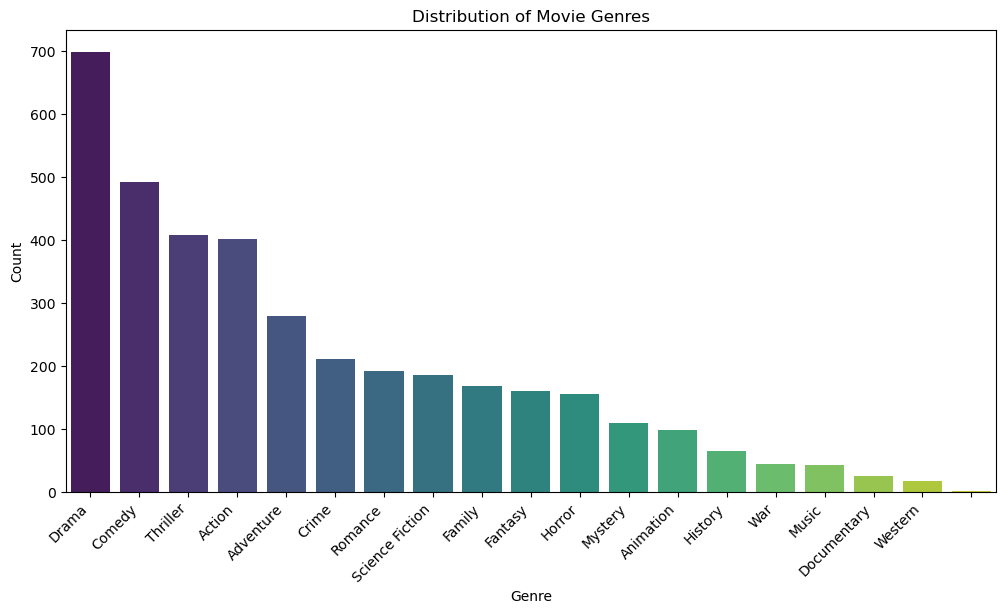

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each genre
genre_counts = tmdb_budget['genre_list'].explode().value_counts()

# Plot the bar plot for movie genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

        * Genre Combinations

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


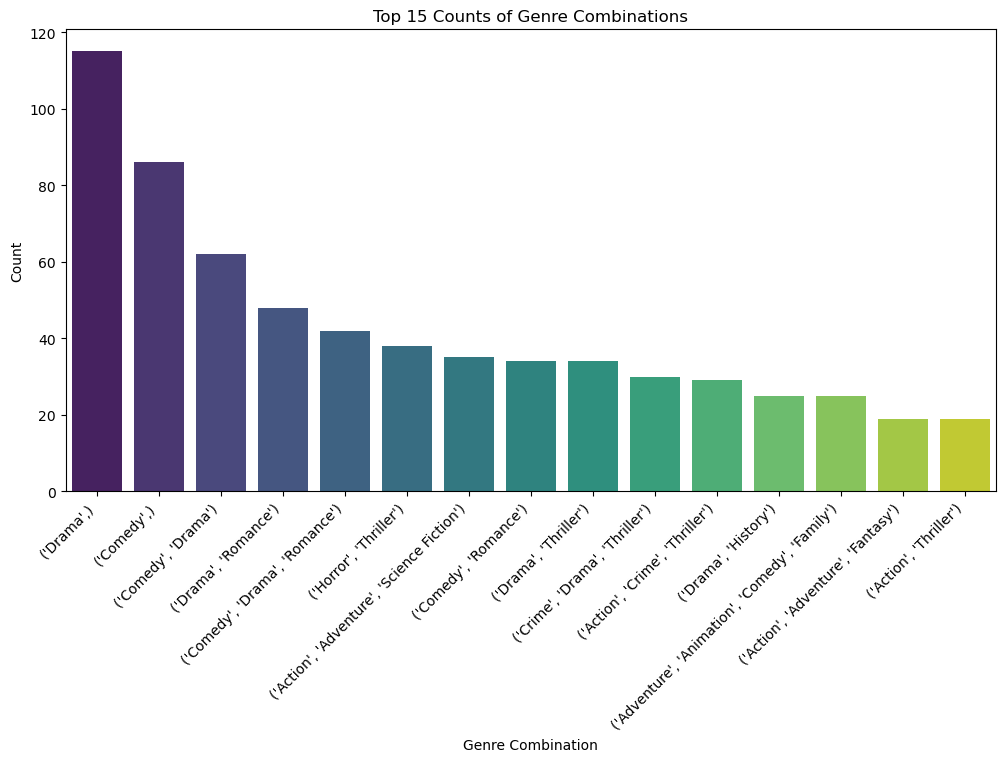

In [37]:
# Count the occurrences of each genre combination
genre_combination_counts = tmdb_budget['genre_list'].apply(tuple).value_counts()

# Top 15 genre combinations
top_15_genre_combinations = genre_combination_counts.head(15)

# Bar plot for counts of the top 15 genre combinations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_genre_combinations.index, y=top_15_genre_combinations.values, palette='viridis')
plt.title('Top 15 Counts of Genre Combinations')
plt.xlabel('Genre Combination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


        * Average Metrics by Genre 

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

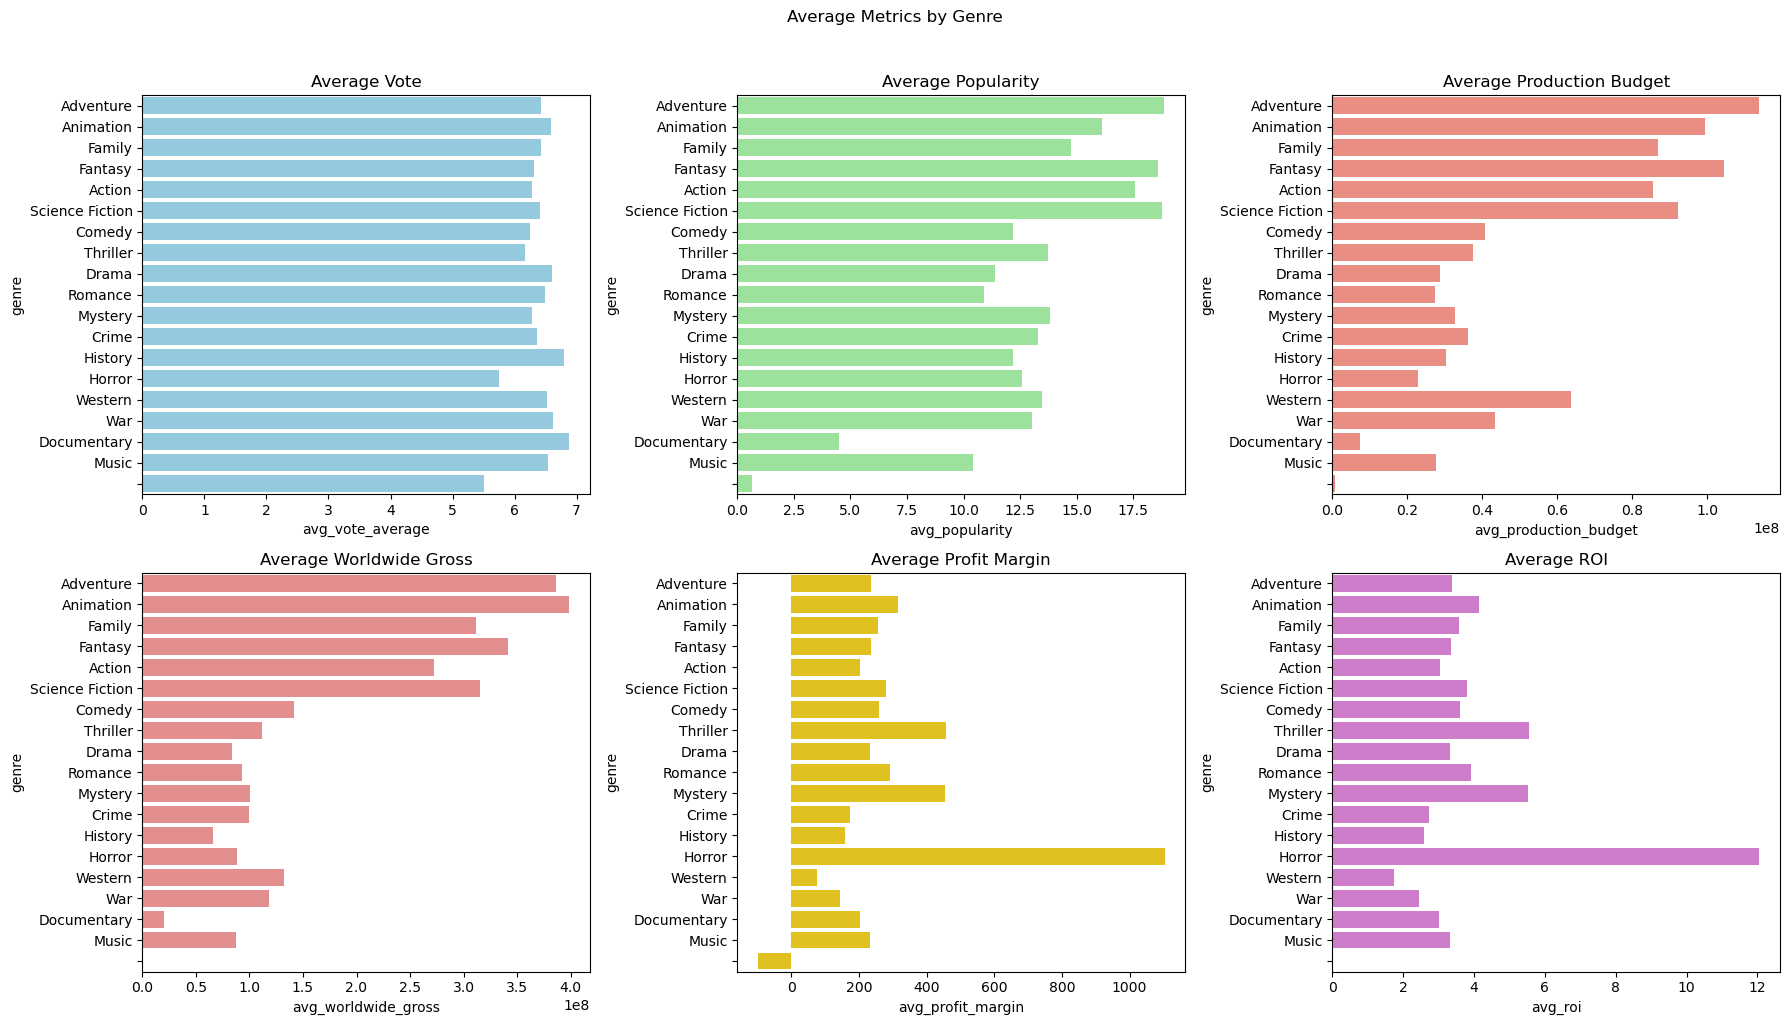

In [38]:
# Empty list to store genre statistics
genre_stats = []

# Iterate over unique genres
for genre in tmdb_budget['genre_list'].explode().unique():
    # Filter DataFrame for rows where the genre is present in the genre_list
    genre_subset = tmdb_budget[tmdb_budget['genre_list'].apply(lambda x: genre in x)]

    # Average statistics for the genre
    avg_vote_average = genre_subset['vote_average'].mean()
    avg_popularity = genre_subset['popularity'].mean()
    avg_production_budget = genre_subset['production_budget'].mean()
    avg_worldwide_gross = genre_subset['worldwide_gross'].mean()
    avg_profit_margin = genre_subset['profit_margin%'].mean()
    avg_roi = genre_subset['ROI'].mean()

    # Append results to the genre_stats list
    genre_stats.append({
        'genre': genre,
        'avg_vote_average': avg_vote_average,
        'avg_popularity': avg_popularity,
        'avg_production_budget': avg_production_budget,
        'avg_worldwide_gross': avg_worldwide_gross,
        'avg_profit_margin': avg_profit_margin,
        'avg_roi': avg_roi
    })

# Convert the list to a DataFrame
genre_stats_df = pd.DataFrame(genre_stats)

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Average Metrics by Genre', y=1.02)

# Bar plot for average vote by genre
sns.barplot(x='avg_vote_average', y='genre', data=genre_stats_df, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Average Vote')

# Bar plot for average popularity by genre
sns.barplot(x='avg_popularity', y='genre', data=genre_stats_df, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Average Popularity')

# Bar plot for average production budget by genre
sns.barplot(x='avg_production_budget', y='genre', data=genre_stats_df, ax=axes[0, 2], color='salmon')
axes[0, 2].set_title('Average Production Budget')

# Bar plot for average worldwide gross by genre
sns.barplot(x='avg_worldwide_gross', y='genre', data=genre_stats_df, ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Average Worldwide Gross')

# Bar plot for average profit margin by genre
sns.barplot(x='avg_profit_margin', y='genre', data=genre_stats_df, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Average Profit Margin')

# Bar plot for average ROI by genre
sns.barplot(x='avg_roi', y='genre', data=genre_stats_df, ax=axes[1, 2], color='orchid')
axes[1, 2].set_title('Average ROI')

# Adjust layout 
plt.tight_layout()
plt.show()

## Genre Analysis
* Drama is by far the most popular genre being nearly 1.5x more popular than Comedy and more than 3x more popular than Crime which is the 6th most popular genre.
* We can see what combination of movie genres usually works best together. Popular combinations like 'Rom Coms', 'Crime Dramas' and 'Thriller Horrors' can be seen in the 'Top 15 Counts of Genre Combinations' visualization.
* The Vote Average seems similar across all genres as the standard deviation is only 0.8, indicating a general uniformity in audience appreciation for different movie types.
* Popularity also does not have a large disparity, although documentaries feature significantly lower. Popularity is measured on several metrics including: Number of votes for the day, 
Number of views for the da, 
Number of users who marked it as afavoritete" for the d, y
Number of users who added it to their "watchlist" for the , ay
Release , ate
Number of total , otes
Previous days. score
* Documentaries score low in almost all categories in comparison to other . Despite their low popularity, they have a low production budget and have a good enough 'ROI' of over 3 which is good for many businesses but pales in comparison to other movie genres.
* A big production budget almost always leads to a higher worldwide gross and an average profit margin and ROI.
* Horror movies boast high ROI's and profit margins despite having very low budgets.This may be due to low costume prices and few locations. Most of it is also special effects.
* Animations score highly in most categories even production budget despite it all being special effects. This is mostly due to licensing of the material as most are based on comics or books, they also mostly use reknown actors for voice overs.
genres

        * Release Years

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


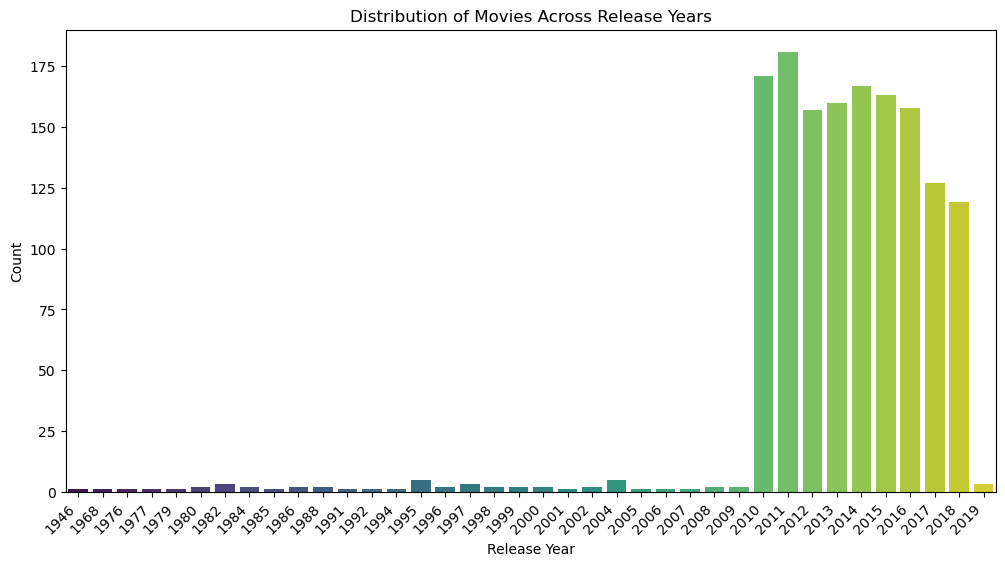

In [39]:
# Plot the bar plot for release years
plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', data=tmdb_budget, palette='viridis')
plt.title('Distribution of Movies Across Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

        * Release Months

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


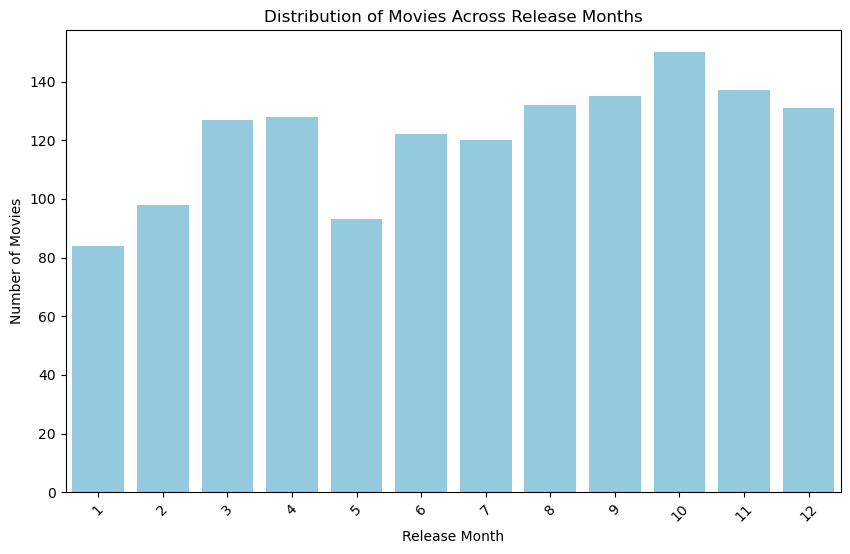

In [40]:
# Number of movies for each release month
release_month_counts = tmdb_budget['release_month'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=release_month_counts.index, y=release_month_counts.values, color='skyblue')
plt.title('Distribution of Movies Across Release Months')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


        * Release seasons

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


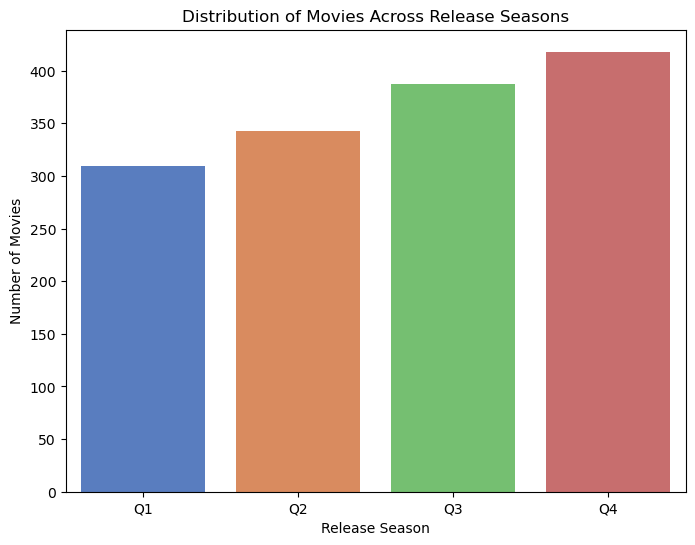

In [41]:
# Countplot for release seasons
plt.figure(figsize=(8, 6))
sns.countplot(x='release_season', data=tmdb_budget, order=['Q1', 'Q2', 'Q3', 'Q4'], palette='muted')

# labels and title
plt.xlabel('Release Season')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies Across Release Seasons')

# Show the plot
plt.show()

## Movie Release Analysis
* Our dataset mostly contains data from the previous decade. No year prior to 2010 contains more than 5 movies. This may have a positive effect on our data findings as it may contain more relevant & recent movie trends.
* Movie releases happen throughout the year with more movies being released in the latter months and the fewest in the early months. October has almost double the number of releases as January.
* The number of movie releases steadily increases per season or quarter, suggesting a seasonal influence on the movie industry.

    * Revenue Scatter Plots

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

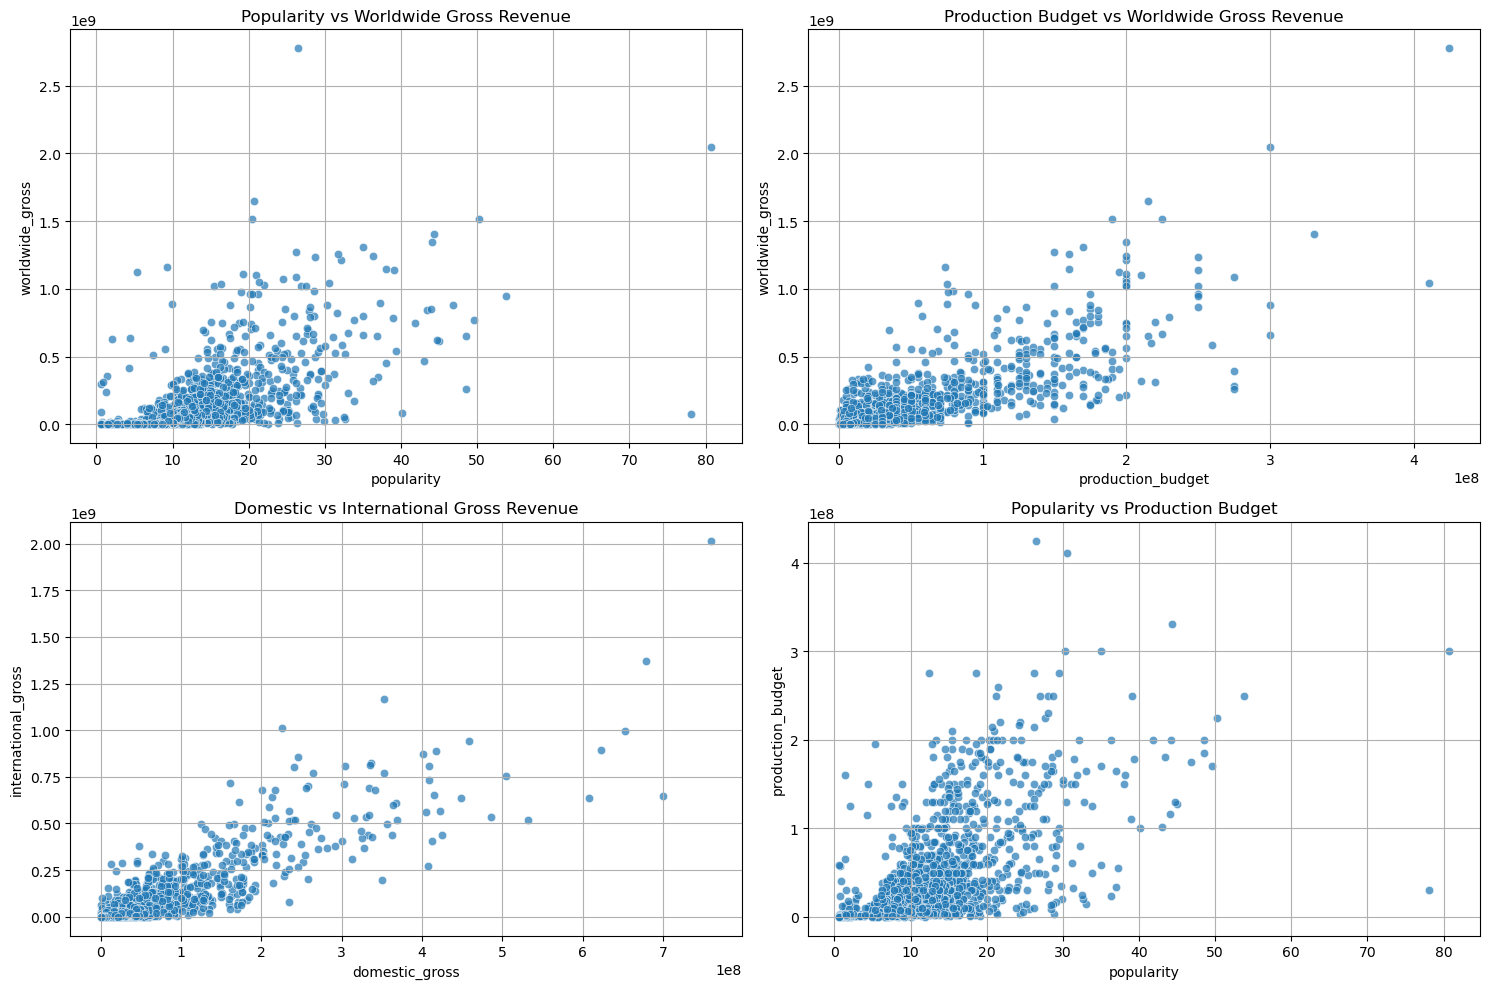

In [42]:
# Scatter plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x='popularity', y='worldwide_gross', data=tmdb_budget, alpha=0.7)
plt.title('Popularity vs Worldwide Gross Revenue')
plt.grid(True)

plt.subplot(2, 2, 2)
sns.scatterplot(x='production_budget', y='worldwide_gross', data=tmdb_budget, alpha=0.7)
plt.title('Production Budget vs Worldwide Gross Revenue')
plt.grid(True)

plt.subplot(2, 2, 3)
sns.scatterplot(x='domestic_gross', y='international_gross', data=tmdb_budget, alpha=0.7)
plt.title('Domestic vs International Gross Revenue')
plt.grid(True)

plt.subplot(2, 2, 4)
sns.scatterplot(x='popularity', y='production_budget', data=tmdb_budget, alpha=0.7)
plt.title('Popularity vs Production Budget')
plt.grid(True)

plt.tight_layout()
plt.show()


In [43]:
import numpy as np

def correlation(df, col1, col2):
    correlation_matrix = np.corrcoef(df[col1], df[col2])
    correlation_coefficient = correlation_matrix[0, 1]
    
    print(f"The correlation coefficient of {col1} vs {col2} is: {correlation_coefficient}")
print(correlation(tmdb_budget, 'popularity', 'worldwide_gross'))
print(correlation(tmdb_budget, 'production_budget', 'worldwide_gross' ))
print(correlation(tmdb_budget,'domestic_gross', 'international_gross'))
print(correlation(tmdb_budget,'popularity', 'production_budget'))

The correlation coefficient of popularity vs worldwide_gross is: 0.6307508162973443
None
The correlation coefficient of production_budget vs worldwide_gross is: 0.7902537468020634
None
The correlation coefficient of domestic_gross vs international_gross is: 0.8688957255502091
None
The correlation coefficient of popularity vs production_budget is: 0.5970741899349525
None


## Movie Revenue Analysis
* Production Budget has good and positive correlations with Worldwide Gross & Popularity of 0.79 & 0.59 respectively. This means a higher budget movie will have a good chance of higher revenue because of the quality. It does not guarantee it will be popular though.
* Popularity has a correlation of 0.63 with Worldwwide Gross, this can be used to infer that a popular movie will probably make more money. But a movie can also be popular for the wrong reasons.
* Domestic Gross has a very high correlation with International Gross, this means that a movie that will perform well in local markets has a high chance of doing well in foreign markets.

    * Reviewing highest grossing films.

In [44]:
# Sort the DataFrame by 'worldwide_gross' in descending order
tmdb_budget_sorted = tmdb_budget.sort_values(by='worldwide_gross', ascending=False)

# Specific columns
selected_columns = ['movie', 'genre', 'popularity', 'vote_count', 'production_budget',
                    'worldwide_gross','release_year', 'release_month', 'release_season', 'release_date']

# Display the sorted DataFrame with selected columns
result = tmdb_budget_sorted.loc[:, selected_columns]

result.head()


,movie,genre,popularity,vote_count,production_budget,worldwide_gross,release_year,release_month,release_season,release_date
6,Avatar,"Action, Adventure, Fantasy, Science Fiction",26.526,18676,425000000.0,2.776345e+09,2009,12,Q4,2009-12-18
1632,Avengers: Infinity War,"Action, Adventure, Fantasy",80.773,13948,300000000.0,2.048134e+09,2018,4,Q2,2018-04-27
1026,Jurassic World,"Action, Adventure, Science Fiction, Thriller",20.709,14056,215000000.0,1.648855e+09,2015,6,Q2,2015-06-12
1031,Furious 7,"Action, Crime, Thriller",20.396,6538,190000000.0,1.518723e+09,2015,4,Q2,2015-04-03
419,The Avengers,"Action, Adventure, Science Fiction",50.289,19673,225000000.0,1.517936e+09,2012,5,Q2,2012-05-04


## Highest Grossing Films (Top 5)
* All films feature an action theme with 4 of them featuring an adventure theme as well.
* They have an average popularity rating of 26.5 which is higher than the 93rd percentile of the whole dataset.
* Action-themed movies dominate the list of highest-grossing films, showcasing the enduring popularity of this genre. 
* Their production budgets and gross revenue averages rank in the 98th and 99th percentile respectively in the whole dataset.
* 4 of the 5 movies were all released in Q2 within 2 months of each other and the highest-grossing film was released in December.
* The 4 films released in Q2 all released within the first week of the month.
* The close proximity of releases in Q2 suggests a deliberate scheduling strategy.

## CONCLUSION
- For producers, directors, and other industry players, these findings offer insightful information. A film's success can be greatly impacted by knowing audience preferences, maximizing release dates, and carefully controlling production costs. These insights act as a roadmap for strategic planning and well-informed decision-making as the industry evolves.